## Problem Statement

In a competitive market like the restaurant industry, understanding the factors that influence business success is crucial for stakeholders. Utilizing the Yelp dataset, this project aims to investigate the relationship between user engagement (reviews, tips, and check-ins) and business success metrics (review count, ratings) for restaurants.

## Research Objectives
1. Quantify the correlation between user engagement (reviews, tips, check-ins) and review count/average star rating: This will help us determine if restaurants with higher user engagement experience a corresponding increase in reviews and ratings.
2. Analyze the impact of sentiment on review count and average star rating: We will investigate if positive sentiment in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.
3. Time trends in User Engagement: We will explore if consistent user engagement over time is a stronger indicator of long-term success compared to sporadic bursts of activity.

## Hypothesis Testing
- Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants.
- Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants.
- Consistent engagement over time is positively associated with sustained business success for restaurants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime 
import numpy as np 
import sqlite3 
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap 
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating database connection
conn = sqlite3. connect ('yelp.db' )

In [3]:
tables = pd.read_sql_query ("SELECT name from sqlite_master where type = 'table'", conn)

In [4]:
tables

,name
0,business
1,review
2,user
3,tip
4,checkin


In [5]:
# explore what type of data available in the tables
for table in tables ['name']:
    display(pd. read_sql_query(f"select * from {table} limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


## Data Analysis

In [6]:
pd.read_sql_query("select count (*) from business", conn)

,count (*)
0,150346


In [7]:
business_id = pd.read_sql_query ("""select business_id, review_count from business where lower(categories) like '%restaurants' and is_open = 1""", conn)

In [8]:
# What is the descriptive stats for review count and star rating for businesses?
# avg, min, max, median
pd.read_sql_query(f"""
SELECT avg(review_count), min(review_count),max(review_count) as max_review_count,
(select review_count from business order by review_count limit 1 offset (select count(*) from business) /2) as median_review_count
from business where business_id IN {tuple(business_id['business_id'])}""", conn)

,avg(review_count),min(review_count),max_review_count,median_review_count
0,91.434442,5,4421,15


In [9]:
pd.read_sql_query (f"""SELECT
 AVG(review_count) AS average_review_count,
 MIN(review_count) AS min_review_count, 
 MAX(review_count) AS max_review_count,
 (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,

 AVG(stars) AS average_star_rating,
 MIN(stars) AS min_star_rating,
 MAX (stars) AS max_star_rating,
 (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
 
FROM business
WHERE business_id IN {tuple(business_id['business_id'])};
""", conn).transpose()

,0
average_review_count,91.434442
min_review_count,5.000000
max_review_count,4421.000000
median_review_count,15.000000
average_star_rating,3.530706
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [10]:
def remove_outliers(df, col): 
    q1 = df [col].quantile(0.25)
    q3 = df [col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df [(df[col] >= lower_bound) & (df [col] <= upper_bound)]
    return df

In [11]:
business_id = remove_outliers(business_id, 'review_count')

In [12]:
business_id.shape

(7722, 2)

In [13]:
# Which restaurants have the highest number of reviews ?

pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating 
from business
where business_id in {tuple(business_id['business_id'])}
group by name 
order by review_count desc 
limit 10""", conn)

,name,review_count,avg_rating
0,Chipotle Mexican Grill,2580,2.452381
1,McDonald's,2086,1.860825
2,Wendy's,1524,2.017857
3,Buffalo Wild Wings,1508,2.233333
4,Outback Steakhouse,1479,2.875000
5,Popeyes Louisiana Kitchen,1370,2.115385
6,Burger King,1365,2.149351
7,Starbucks,1236,3.220588
8,Panda Express,1223,2.581081
9,Red Robin Gourmet Burgers and Brews,1212,2.944444


In [14]:
# Which restaurants have the highest rating ?

pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating 
from business
where business_id in {tuple(business_id['business_id'])}
group by name 
order by avg_rating desc 
limit 10""", conn)

,name,review_count,avg_rating
0,taqueria la cañada,17,5.0
1,d4 Tabletop Gaming Cafe,8,5.0
2,Zorba Cafe,5,5.0
3,Yaso Jamaican Grill,92,5.0
4,Xtreme Tacos - Seminole Heights,145,5.0
5,Wolly’s Kitchen,10,5.0
6,Willie's Backyard BBQ,14,5.0
7,Wild Olive Provisions,11,5.0
8,Whole and Grounded Cafe,16,5.0
9,Virginia's Market,6,5.0


In [15]:
# Do restaurants with higher engagement tend to have higher ratings ?

pd. read_sql_query("""select business_id, 
sum (length(date) - length( replace(date, ',',''))+1) as checkin_count
from checkin 
group by business_id
""", conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [16]:
pd. read_sql_query("""select business_id, count(*) as tip_count
from tip 
group by business_id
""", conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [17]:
review_count_df = pd. read_sql_query(f"""SELECT total.avg_rating as rating,
AVG (total.review_count) as avg_review_count,
AVG (total.checkin_count) as avg_checkin_count,
AVG (total. tip_count) as avg_tip_count
FROM
(SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY

    b.business_id) as total
    
GROUP BY total.avg_rating
""", conn)

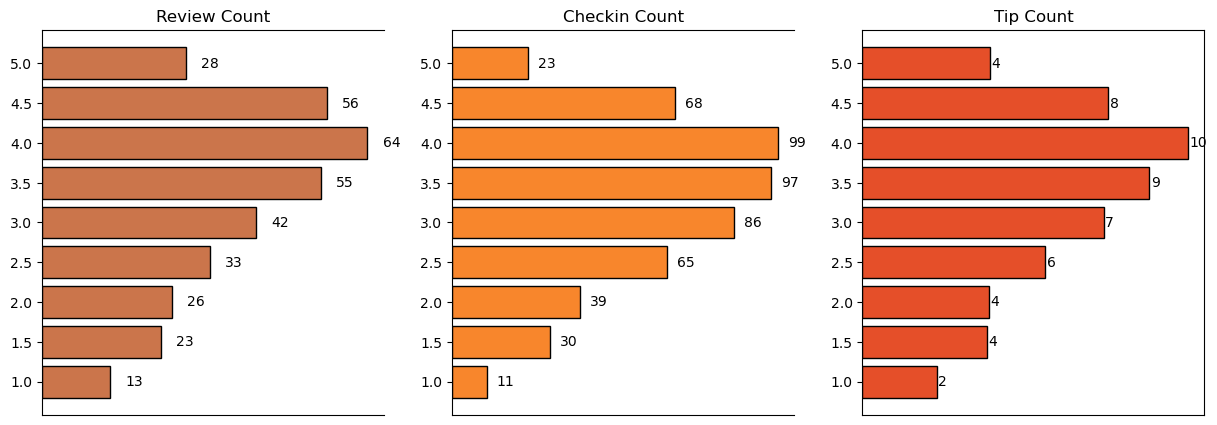

In [18]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot (1,3,1)
plt.title('Review Count')
plt. barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt. text(value+3, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot (1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df ['avg_checkin_count']):
    plt. text(value+3, i, str(round(value) ), color='black', va='center')
    
plt.xticks([])
plt.subplot (1,3,3)
plt.title('Tip Count')
plt. barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor = 'k', color='#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value) ), color='black', va='center')
    
plt.xticks([])
plt.show()

In [19]:
# Is there a correlation between the number of reviews, tips, and check-ins for a business?
engagement_df = pd.read_sql_query (f"""SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count,
    (CASE WHEN b.stars >= 3.5 Then 'Hich-Rated' Else 'Low-Rated' END) as category

FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE
    b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id

""", conn).dropna()

In [20]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.628139,0.771509
checkin_count,0.628139,1.000000,0.750968
tip_count,0.771509,0.750968,1.000000


<Axes: >

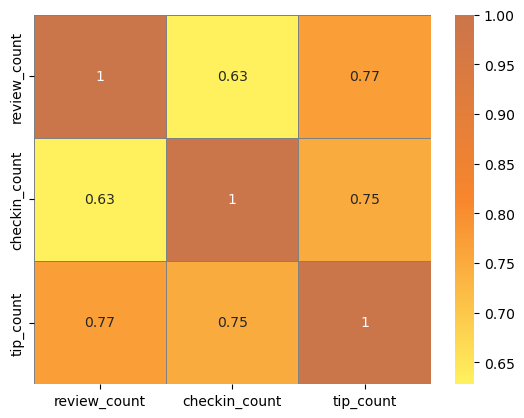

In [21]:
colors = ['#FFF15E', "#F8862C", "#CB754B"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='grey')

In [22]:
# Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?
engagement_df.groupby("category")[['review_count', 'tip_count', 'checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
Hich-Rated,62.931458,8.842599,96.200938
Low-Rated,38.729583,5.941016,74.671053


In [23]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df) :
    success_score = []
    for index, row in df.iterrows ():
        score = row['avg_rating'] * np.log(row['review_count'] + 1) 
        success_score.append(score)
    return success_score

In [24]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?
city_df = pd. read_sql_query(f"""select city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count,
count(*) as restaurant_count 
from business
WHERE business_id IN {tuple(business_id['business_id'])} 
group by state, city 
order by review_count desc 
limit 10 """, conn)

city_df['success_score'] = calculate_success_metric(city_df)
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.943223,-75.162568,3.516426,38043,761,37.085980
1,Indianapolis,IN,39.904320,-86.053080,3.346774,20366,434,33.205593
2,Tampa,FL,28.054888,-82.399548,3.591644,19361,371,35.453363
3,Tucson,AZ,32.338572,-111.010760,3.379310,17800,319,33.073344
4,Nashville,TN,36.202427,-86.692898,3.511594,17598,345,34.327931
5,New Orleans,LA,29.963974,-90.042604,3.683258,13464,221,35.019860
6,Edmonton,AB,53.541717,-113.491940,3.481132,11566,424,32.569164
7,Saint Louis,MO,38.746159,-90.279815,3.415094,11509,212,31.934450
8,Reno,NV,39.474965,-119.792223,3.447368,9308,133,31.504593
9,Boise,ID,43.619246,-116.254688,3.514815,8690,135,31.879523


In [25]:
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)
                                                            
# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                    vmin=city_df ['success_score'].min(),
                                    vmax=city_df ['success_score'].max())
                                                            
# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']], 
        radius=5, 
        color=color_scale(row['success_score']), 
        fill=True, 
        fill_color=color_scale(row['success_score']), 
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ). add_to(m)
                                                            
# Add color scale to the map
m.add_child(color_scale)

In [26]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM 
(SELECT strftime ('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""", conn)

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM 
(SELECT strftime ('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""", conn)

In [27]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,261,20
1,01-2011,460,99
2,01-2012,657,276
3,01-2013,838,271
4,01-2014,1125,298
...,...,...,...
148,12-2017,2071,299
149,12-2018,2738,269
150,12-2019,3024,273
151,12-2020,2546,233


In [28]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,142,7
1,01-2011,242,53
2,01-2012,376,111
3,01-2013,502,126
4,01-2014,586,117
...,...,...,...
148,12-2017,1200,90
149,12-2018,1571,79
150,12-2019,1719,58
151,12-2020,1145,28


In [29]:
time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year 
;""", conn)

time_rating

,month_year,avg_rating
0,01-2006,4.500000
1,01-2007,3.821429
2,01-2008,3.600000
3,01-2009,3.719048
4,01-2010,3.677419
...,...,...
198,12-2017,3.617548
199,12-2018,3.632165
200,12-2019,3.648324
201,12-2020,3.822541


In [30]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement ['month._year'] = pd. to_datetime(high_rated_engagement ['month_year'] )
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement [high_rated_engagement['month_year']>'2017']

low_rated_engagement ['month_year'] = pd.to_datetime (low_rated_engagement ['month_year'])
low_rated_engagement.sort_values( 'month_year', inplace = True)
low_rated_engagement = low_rated_engagement [low_rated_engagement ['month_year']>'2017']

In [31]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

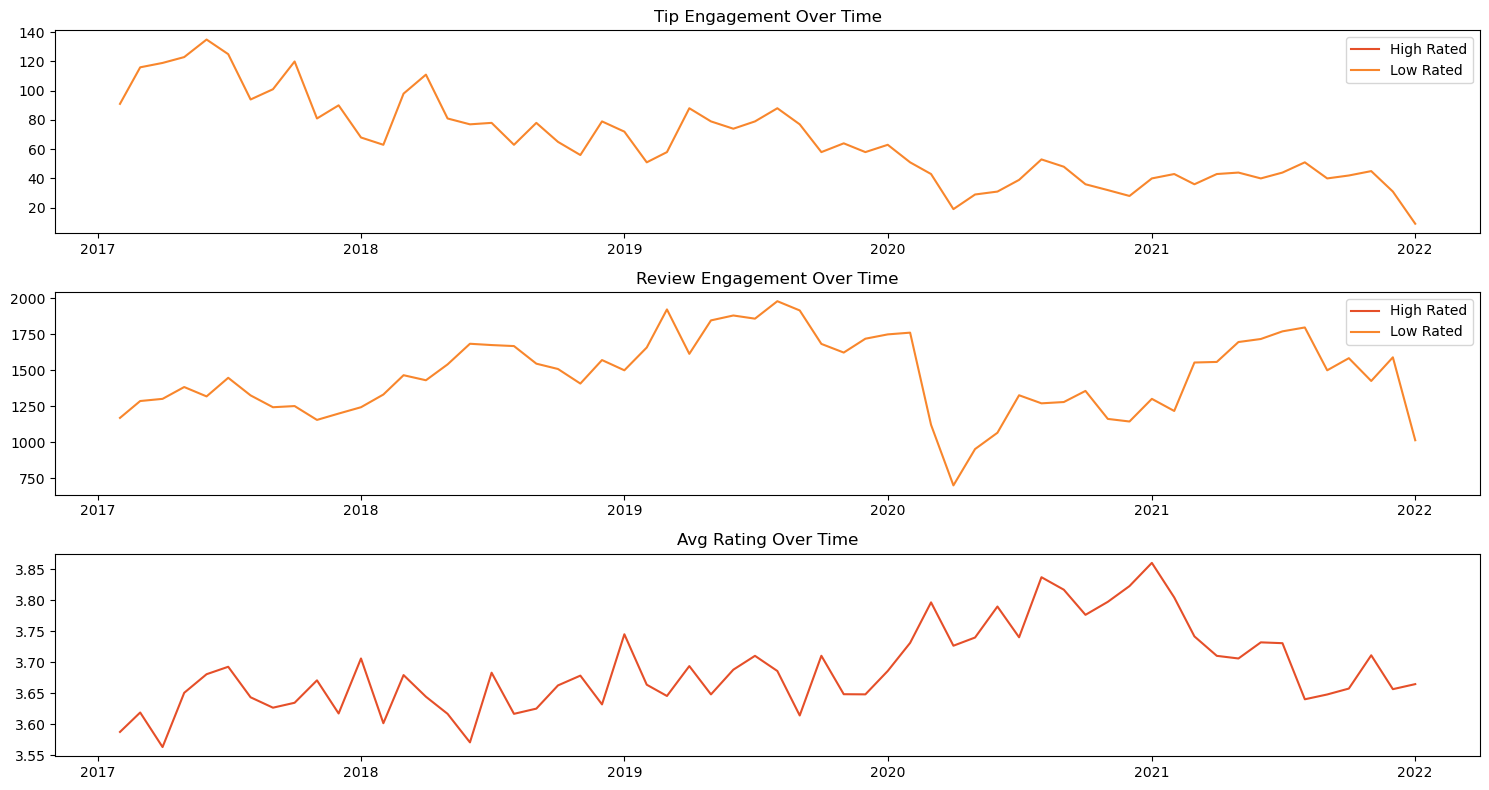

In [32]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title( 'Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement ['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement ['review_count'], label = 'Low Rated', color = '#F8862C' )
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [33]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')

In [34]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM 
(SELECT business_id,
    SUM(useful) as useful_count,
    SUM (funny) as funny_count,
    SUM (cool) as cool_count
FROM
    review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b. business_id
ORDER BY review_count""", conn)

sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [35]:
sentiment_df ['success_score'] = calculate_success_metric(sentiment_df)

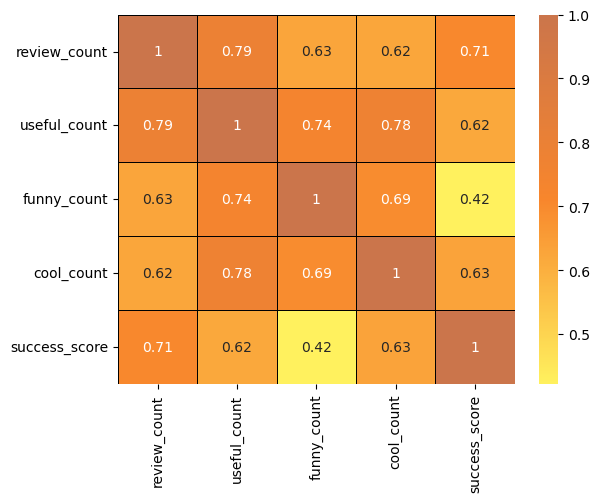

In [36]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor = 'black')
plt.show()

In [37]:
# Is there any difference in engagement of elite users and non elite users?
elite_df = pd.read_sql_query ("""SELECT
    elite,
    COUNT (*) As row_count,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite;
""", conn)

elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


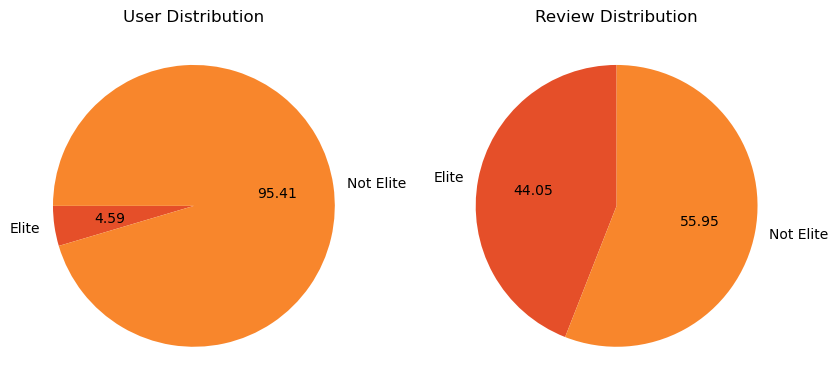

In [38]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels = elite_df['elite'], autopct = '%.2f', startangle = 180, colors = ['#E54F29', '#F8862C'] )

plt.subplot(1,2,2)
plt. title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f', startangle = 90, colors = ['#E54F29', '#F8862C'])
plt.show()

In [39]:
# What are the busiest hours for restaurants?

review_engagement = pd.read_sql_query ("""SELECT
   cast (strftime('%H',date) as integer)
   as hour,
   COUNT (*) AS review_count
FROM
   review
GROUP BY 
  hour;
""", conn)

tip_engagement = pd.read_sql_query ("""SELECT
  cast (strftime('%H',date) as integer)
  as hour,
  COUNT (*) AS tip_count
FROM 
  tip
GROUP BY 
  hour;
""", conn)

checkin= pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend ([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

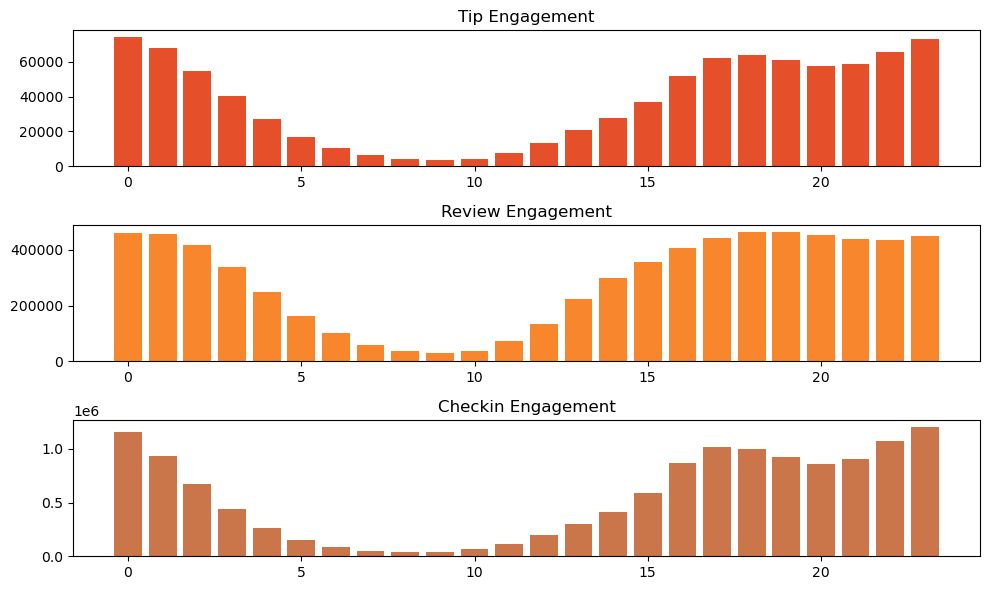

In [40]:
plt.figure(figsize = (10,6))
plt.subplot (3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement ['tip_count'], color = '#E54F29')
plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement[ 'hour'], review_engagement ['review_count'], color = '#F8862C')
plt.subplot (3,1,3)
plt. title( 'Checkin Engagement')
plt. bar (checkin_engagement.index, checkin_engagement [0], color = '#CB754B' )
plt.tight_layout()
plt.show()